# DIP PBL PROJECT LOVEKESH JAIN(1032211557)
# DIP PBL PROJECT SHREYAS SHINDE(1032211814)

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Dense, 
    GlobalAveragePooling2D, 
    Dropout, 
    InputLayer, 
    Flatten
)
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50

# Scikit-learn
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    roc_auc_score, 
    recall_score, 
    precision_score, 
    confusion_matrix, 
    roc_curve
)

# Visualization
import seaborn as sns

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 20
PATH = 'C:/Users/lovek/OneDrive/Desktop/data/dataset'

In [3]:
dataset = image_dataset_from_directory(
    PATH + '/Train',
    seed = 42,
    shuffle = True,
    image_size = (IMAGE_SIZE , IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1747 files belonging to 7 classes.


In [4]:
class_names = dataset.class_names
class_names

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

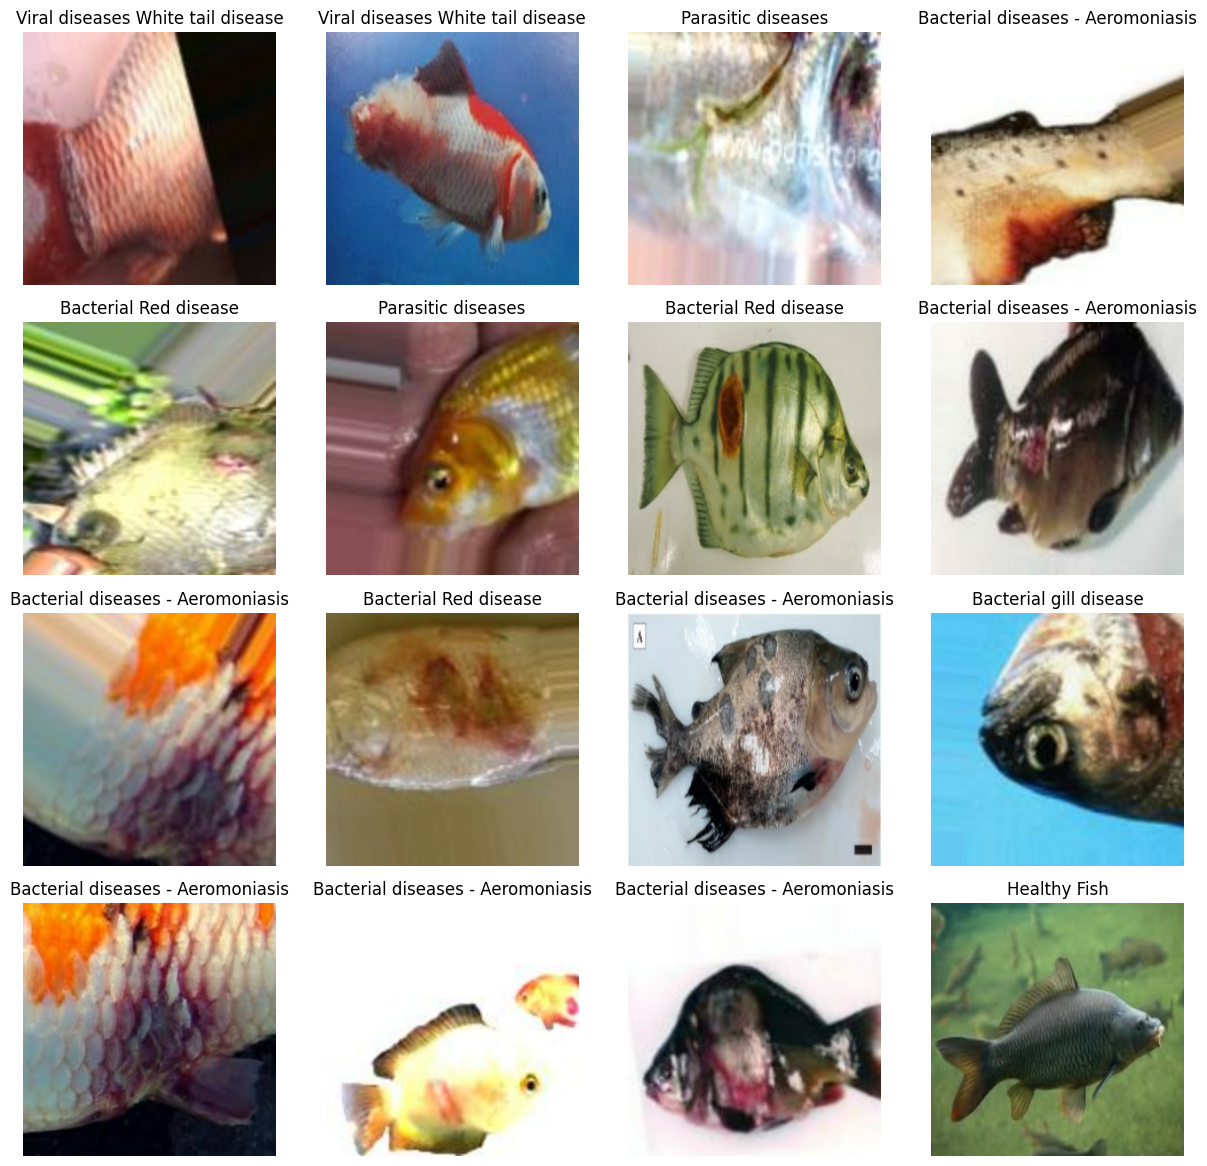

In [5]:
plt.figure(figsize=(12, 12))
for batch_images, batch_labels in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(batch_images[i].numpy().astype("uint8"))
        plt.title(class_names[batch_labels[i]])
        plt.tight_layout()
        plt.axis("off")


In [6]:
TRAIN_SIZE, VALIDATION_SIZE= 0.9, 0.1

In [7]:
train_batch = int(len(dataset) * TRAIN_SIZE)
train_ds = dataset.take(train_batch)

In [8]:
val_batch = int(len(dataset) * VALIDATION_SIZE)
validation_ds = dataset.skip(train_batch).take(val_batch)

In [9]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [10]:
data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.2),
])

In [11]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

# ResNet50
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

base_model.trainable = False

# Model
model = Sequential([
    base_model,
    Flatten(),
    Dense(384, activation='relu'),
    Dense(n_classes, activation='softmax') 
])


In [13]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [14]:
callback = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model.keras')
]

In [15]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = validation_ds,
    verbose = 1,
    epochs = EPOCHS,
    callbacks = callback
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.2867 - loss: 46.1987 - val_accuracy: 0.5625 - val_loss: 2.0643
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.6216 - loss: 1.6898 - val_accuracy: 0.6750 - val_loss: 1.5809
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.7562 - loss: 0.9878 - val_accuracy: 0.7750 - val_loss: 0.9348
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.8419 - loss: 0.5919 - val_accuracy: 0.8625 - val_loss: 0.3575
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.8672 - loss: 0.5098 - val_accuracy: 0.8875 - val_loss: 0.4141
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8787 - loss: 0.4428 - val_accuracy: 0.9000 - val_loss: 0.3761
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9108 - loss: 0.3444 - val_accuracy: 0.8938 - val_loss: 0.3363
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9250 - loss: 0.2584 - val_accuracy: 0.9187 - 

In [16]:

model = load_model('C:/Users/lovek/OneDrive/Desktop/model.keras')

In [17]:
test_dataset = image_dataset_from_directory(
    PATH + '/Test',
    seed = 42,
    shuffle = True,
    image_size = (IMAGE_SIZE , IMAGE_SIZE),
    batch_size = BATCH_SIZE
).prefetch(buffer_size=tf.data.AUTOTUNE)

Found 697 files belonging to 7 classes.


In [18]:
all_predictions = []
all_labels = []
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    all_predictions.extend(predicted_classes)
    all_labels.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [19]:
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

Accuracy:  0.9670014347202296
F1 Score:  0.967237521146457
Recall:  0.9670014347202296
Precision:  0.9690269454298766


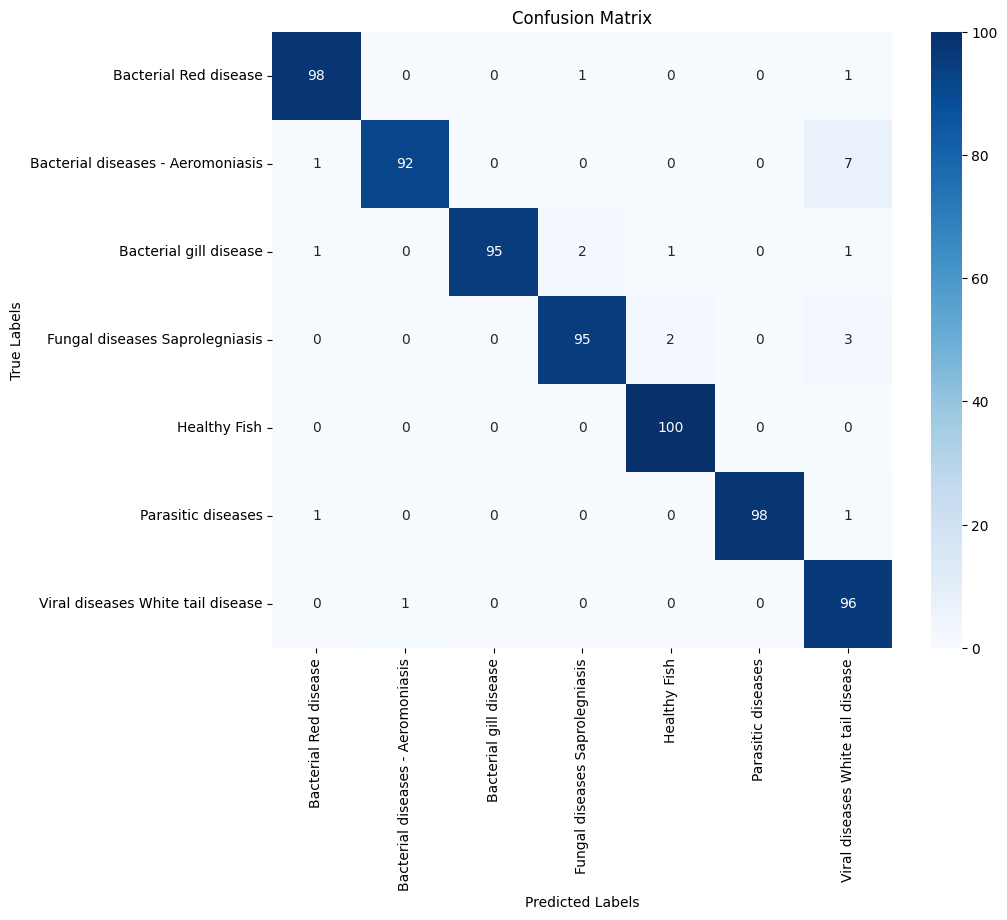

In [20]:
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()


In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

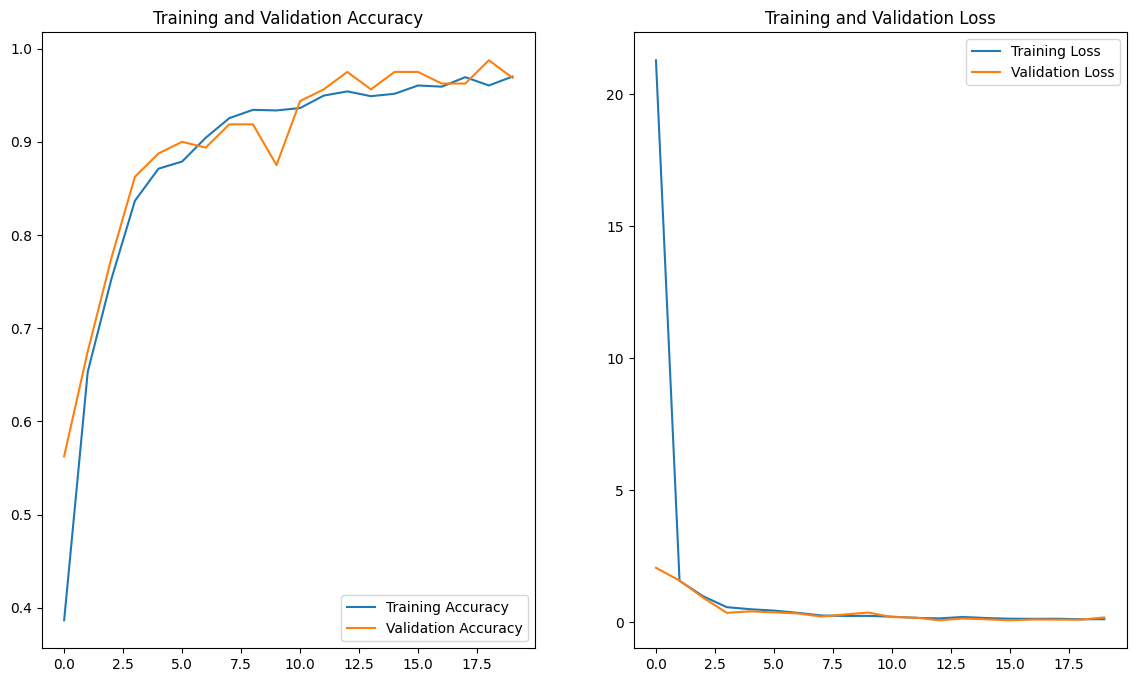

In [22]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('curves.png', dpi = 300)
plt.show()

In [23]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image.numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

## Running Inference

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


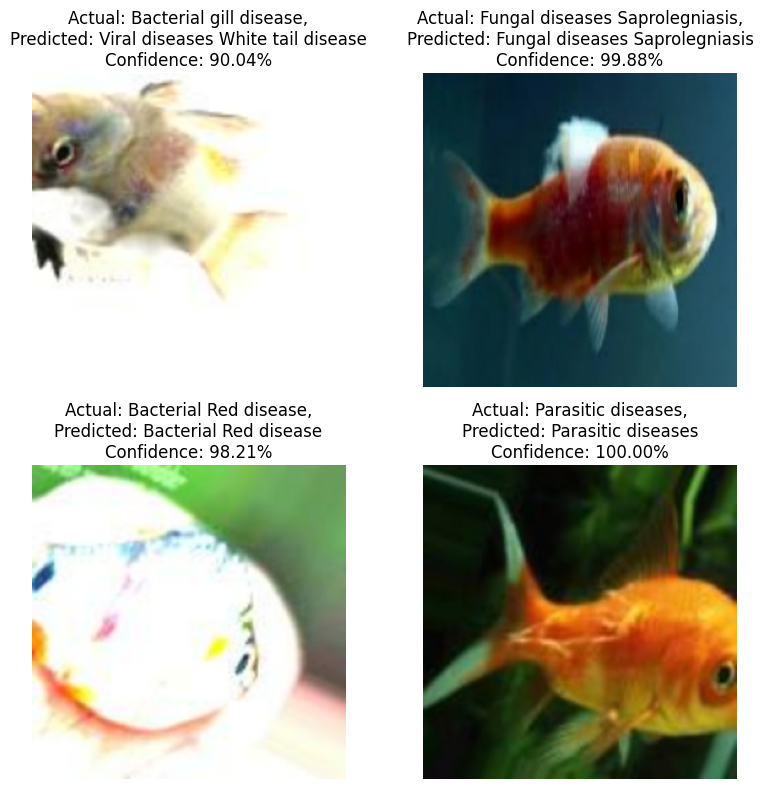

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

for images, labels in test_dataset.take(1):  # Load one batch
    for i in range(4):  # Visualize only the first 4 images in the batch
        ax = plt.subplot(2, 2, i + 1)
        if i < len(images):
            ax.imshow(images[i].numpy().astype("uint8"))

            # Assuming `predict()` returns both predicted label and confidence score
            predicted_class, confidence = predict(model, images[i])
            actual_class = class_names[labels[i]]

            ax.set_title(f"Actual: {actual_class},\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
            ax.axis("off")

plt.tight_layout()
plt.show()

# Inference from File

In [25]:
def sample_predict(model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    img = Image.open(image_path)
    plt.imshow(img)
    print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted class: Parasitic diseases


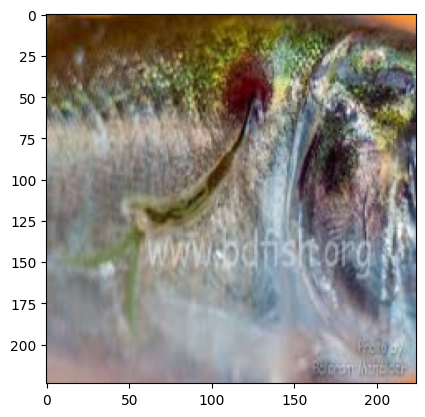

In [26]:
sample_predict(model, 'C:/Users/lovek/OneDrive/Desktop/data/dataset/Test/Parasitic diseases/Parasitic diseases (19).jpg')

In [27]:
def convert_path(path):
    # Replace backslashes with forward slashes
    return path.replace("\\", "/")

# Example usage:
image_path = r"C:\Users\Username\Pictures\image.jpg"
converted_path = convert_path(image_path)
print("Converted path:", converted_path)


Converted path: C:/Users/Username/Pictures/image.jpg


In [28]:
convert_path('C:\\Users\\lovek\\OneDrive\\Desktop\\data\\dataset\\Test\\Viral diseases White tail disease\\Viral diseases White tail disease (5).jpeg')

'C:/Users/lovek/OneDrive/Desktop/data/dataset/Test/Viral diseases White tail disease/Viral diseases White tail disease (5).jpeg'